In [ ]:
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import ViTImageProcessor, ViTForImageClassification, AdamW
from transformers import SwinForImageClassification
from transformers import CLIPProcessor, CLIPModel

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
safe_text_data = pd.read_csv('/content/drive/MyDrive/SafeLens Dataset/Data-Preprocessing-Files/Text/Safe Text.csv')
unsafe_text_data = pd.read_csv('/content/drive/MyDrive/SafeLens Dataset/Data-Preprocessing-Files/Text/Unsafe Text.csv')
unsafe_text_data['Category'] = unsafe_text_data['Category'].replace('Terrosim', 'Terrorism')

In [ ]:
print(safe_text_data['Category'].unique())
print(unsafe_text_data['Category'].unique())

['Optimism' 'Learning' 'Nostalgia']
['Sexism' 'Suicidal' 'Harassment' 'Religion' 'Terrorism' 'Other' 'Fraud'
 'Harmful']


In [ ]:
safe_text_data

,Text,Category
0,"Wow, this is really inspiring! Your journey is...",Optimism
1,बहुत बढ़िया अंतर्दृष्टि! मैंने आज भौतिकी के बा...,Learning
2,This post truly resonated with me. The way you...,Learning
3,आपका दृष्टिकोण सचमुच आंखें खोल देने वाला है। य...,Optimism
4,Such a well-written piece! I appreciate the de...,Optimism
...,...,...
145,अपने बचपन के पसंदीदा खिलौने की यादें साझा करें।,Nostalgia
146,अपने स्कूल का सबसे यादगार कार्यक्रम कौन-सा था?,Nostalgia
147,"गर्मी की छुट्टियों की कोई खास याद साझा करें, ज...",Nostalgia
148,अपने माता-पिता के साथ बिताए किसी खास पल का अनुभव।,Nostalgia


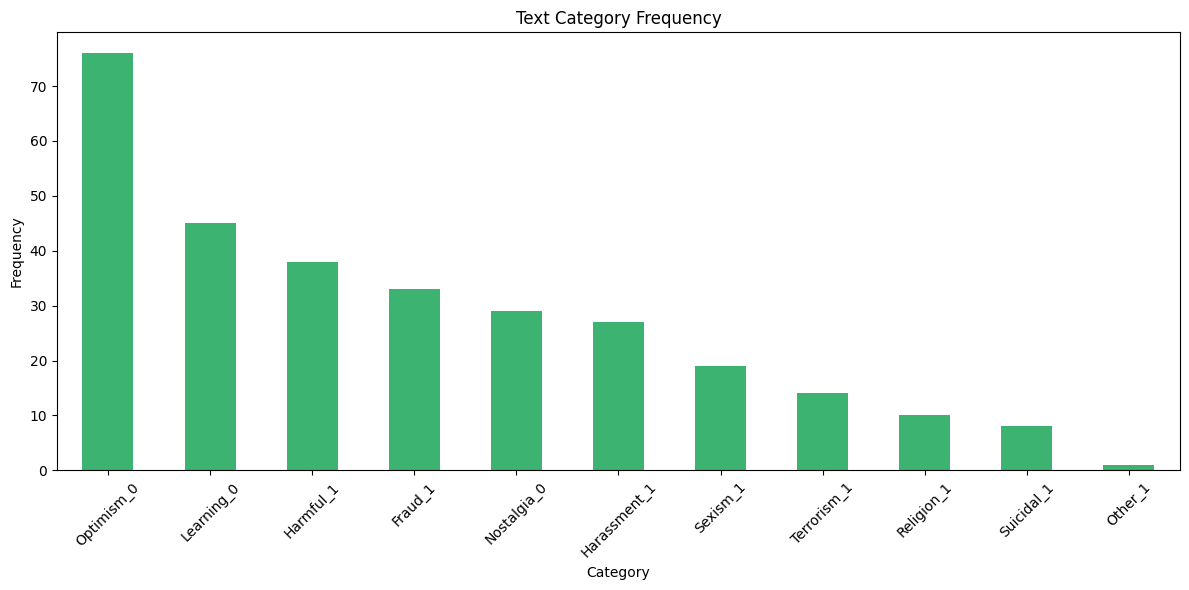

In [ ]:
safe_text_data['label'] = 0
unsafe_text_data['label'] = 1

combined_data = pd.concat([safe_text_data, unsafe_text_data])
# Step 1: Trim spaces from the 'Category' column
combined_data['Category'] = combined_data['Category'].str.strip()

# Step 3: Update the 'Category' column with the format "Category_Label"
combined_data['Category'] = combined_data.apply(lambda row: f"{row['Category']}_{row['label']}", axis=1)

# Count the frequencies of each category
category_counts = combined_data['Category'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='mediumseagreen')
plt.title('Text Category Frequency')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
image_category_data = pd.read_csv('/content/drive/MyDrive/SafeLens Dataset/Data-Preprocessing-Files/Image/images_label_category.csv')
image_category_data['Category'].unique()

array(['Violence', 'Profession', 'Other', 'Joy', 'Nature', 'Culture',
       'Medical', 'H&S', 'Illegal'], dtype=object)

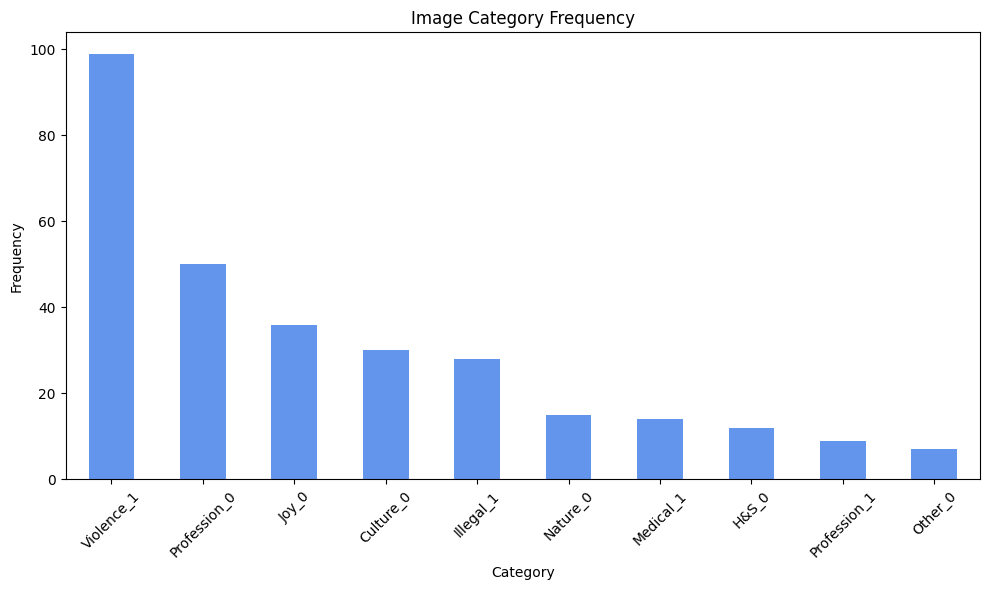

In [ ]:
# Get the unique categories and their counts
category_counts = image_category_data['Category'].value_counts()
# Step 1: Trim spaces from the 'Category' column
image_category_data['Category'] = image_category_data['Category'].str.strip()

# Step 3: Update the 'Category' column with the format "Category_Label"
image_category_data['Category'] = image_category_data.apply(lambda row: f"{row['Category']}_{row['label']}", axis=1)

# Count the frequencies of each category
category_counts = image_category_data['Category'].value_counts()
# Plotting
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='cornflowerblue')
plt.title('Image Category Frequency')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                                          audio_path  label      Category
0  /content/drive/MyDrive/SafeLens Dataset/Safe-A...      0      Comedy_0
1  /content/drive/MyDrive/SafeLens Dataset/Safe-A...      0  Motivation_0
2  /content/drive/MyDrive/SafeLens Dataset/Safe-A...      0       Other_0
3  /content/drive/MyDrive/SafeLens Dataset/Safe-A...      0      Comedy_0
4  /content/drive/MyDrive/SafeLens Dataset/Safe-A...      0      Comedy_0


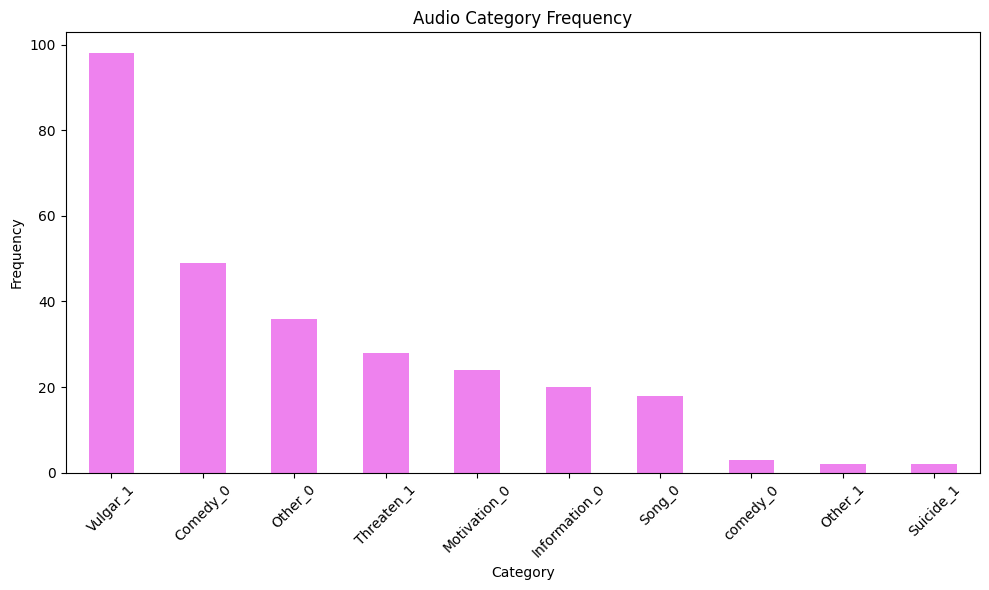

In [ ]:
import pandas as pd

# Load the DataFrame
audio_df = pd.read_csv('/content/drive/MyDrive/SafeLens Dataset/audio_label_category.csv')

# Step 1: Trim spaces from the 'Category' column
audio_df['Category'] = audio_df['Category'].str.strip()

# Step 2: Replace "Motivational" with "Motivation"
audio_df['Category'] = audio_df['Category'].replace('Motivational', 'Motivation')

# Step 3: Update the 'Category' column with the format "Category_Label"
audio_df['Category'] = audio_df.apply(lambda row: f"{row['Category']}_{row['label']}", axis=1)

# Print the first few rows to verify changes
print(audio_df.head())

# Count the frequencies of each category
category_counts = audio_df['Category'].value_counts()
# Plotting
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='violet')
plt.title('Audio Category Frequency')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Load the CSV
df = pd.read_csv('/content/drive/MyDrive/SafeLens Dataset/images_label_category.csv')

# Step 1: Trim spaces from the 'Category' column
df['Category '] = df['Category '].str.strip()

# Step 3: Update the 'Category ' column with the format "Category_Label"
df['Category '] = df.apply(lambda row: f"{row['Category ']}_{row['label']}", axis=1)

# Split the data
train_df, test_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=42)
val_df, test_df = train_test_split(test_df, test_size=0.5, stratify=test_df['label'], random_state=42)

train_df.to_csv('/content/drive/MyDrive/SafeLens Dataset/train_images.csv', index=False)
val_df.to_csv('/content/drive/MyDrive/SafeLens Dataset/val_images.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/SafeLens Dataset/test_images.csv', index=False)

print("Data has been split into train, validation, and test sets.")


Data has been split into train, validation, and test sets.


In [ ]:
class ImageDataset(Dataset):
    def __init__(self, csv_file, transform=None, processor=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform
        self.processor = processor

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx, 0]
        label = self.data.iloc[idx, 1]
        category = self.data.iloc[idx, 2]

        # Load image
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)
        if self.processor:
            # Preprocess the image using CLIP processor
            image = self.processor(images=image, return_tensors="pt")["pixel_values"].squeeze(0)

        return image, torch.tensor(label, dtype=torch.long), img_path, category

In [ ]:
google_vit_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
swin_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# Initialize CLIP processor and model
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

In [ ]:
# Create datasets
train_dataset1 = ImageDataset('/content/drive/MyDrive/SafeLens Dataset/train_images.csv', transform=google_vit_transform)
val_dataset1 = ImageDataset('/content/drive/MyDrive/SafeLens Dataset/val_images.csv', transform=google_vit_transform)
test_dataset1 = ImageDataset('/content/drive/MyDrive/SafeLens Dataset/test_images.csv', transform=google_vit_transform)

# Create data loaders
train_loader1 = DataLoader(train_dataset1, batch_size=32, shuffle=True, num_workers=2)
val_loader1 = DataLoader(val_dataset1, batch_size=32, shuffle=False, num_workers=2)
test_loader1 = DataLoader(test_dataset1, batch_size=32, shuffle=False, num_workers=2)

print("Data loaders are ready.")


Data loaders are ready.


In [ ]:
train_dataset2 = ImageDataset('/content/drive/MyDrive/SafeLens Dataset/train_images.csv', transform=swin_transform)
val_dataset2 = ImageDataset('/content/drive/MyDrive/SafeLens Dataset/val_images.csv', transform=swin_transform)
test_dataset2 = ImageDataset('/content/drive/MyDrive/SafeLens Dataset/test_images.csv', transform=swin_transform)

# Create data loaders
train_loader2 = DataLoader(train_dataset2, batch_size=32, shuffle=True, num_workers=2)
val_loader2 = DataLoader(val_dataset2, batch_size=32, shuffle=False, num_workers=2)
test_loader2 = DataLoader(test_dataset2, batch_size=32, shuffle=False, num_workers=2)


In [ ]:
train_dataset3 = ImageDataset('/content/drive/MyDrive/SafeLens Dataset/train_images.csv', processor=clip_processor)
val_dataset3 = ImageDataset('/content/drive/MyDrive/SafeLens Dataset/val_images.csv', processor=clip_processor)
test_dataset3 = ImageDataset('/content/drive/MyDrive/SafeLens Dataset/test_images.csv', processor=clip_processor)

# Create data loaders for CLIP
train_loader3 = DataLoader(train_dataset3, batch_size=32, shuffle=True, num_workers=2)
val_loader3 = DataLoader(val_dataset3, batch_size=32, shuffle=False, num_workers=2)
test_loader3 = DataLoader(test_dataset3, batch_size=32, shuffle=False, num_workers=2)


In [ ]:
len(train_loader1), len(test_loader1), len(val_loader1)

(7, 2, 2)

In [ ]:
class ViTWithMLP(nn.Module):
    def __init__(self, vit_model):
        super(ViTWithMLP, self).__init__()
        self.vit = vit_model
        self.classifier = nn.Linear(1000, 2)

    def forward(self, x):
        with torch.no_grad():
            x = self.vit(x).logits
        return self.classifier(x)


In [ ]:
import os
import matplotlib.pyplot as plt

def train_model(model, model_save_path, train_loader, val_loader, device='cuda', num_epochs=5):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.classifier.parameters(), lr=1e-4)

    model.to(device)

    best_val_loss = float('inf')

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_preds = 0

        # Training loop
        for images, labels, _, _ in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels).item()

        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = correct_preds / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_accuracy)
        print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

        # Validation loop
        model.eval()
        val_loss = 0.0
        val_correct_preds = 0
        with torch.no_grad():
            for images, labels, _, _ in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                val_correct_preds += torch.sum(preds == labels).item()

        val_epoch_loss = val_loss / len(val_loader)
        val_epoch_accuracy = val_correct_preds / len(val_loader.dataset)
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_accuracy)
        print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_accuracy:.4f}")

        if val_epoch_loss < best_val_loss:
            best_val_loss = val_epoch_loss
            torch.save(model.state_dict(), model_save_path)
            print(f"Saved best model with validation loss: {best_val_loss:.4f}")

    # # Plotting the training and validation losses
    # plt.figure(figsize=(10, 5))
    # plt.plot(train_losses, label='Training Loss', marker='o')
    # plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', marker='o')
    # plt.title('Training and Validation Losses')
    # plt.xlabel('Epochs')
    # plt.ylabel('Loss')
    # plt.legend()
    # plt.grid()
    # plt.show()

    # # Plotting the training and validation accuracies
    # plt.figure(figsize=(10, 5))
    # plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', marker='o')
    # plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', marker='o')
    # plt.title('Training and Validation Accuracies')
    # plt.xlabel('Epochs')
    # plt.ylabel('Accuracy')
    # plt.legend()
    # plt.grid()
    # plt.show()

    # Plot training and validation metrics including training and validation losses and accuracies
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss', marker='o')
    plt.plot(val_losses, label='Validation Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.grid(True)
    plt.legend()

    # Set integer ticks for x and y axes
    plt.xticks(range(0, num_epochs+1))  # X-axis should be integer values from 0 to num_epochs-1
    # plt.yticks(range(0, int(max(max(train_losses), max(val_losses))) + 1))  # Y-axis should be integer values up to max loss value

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy', marker='o')
    plt.plot(val_accuracies, label='Validation Accuracy', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.grid(True)
    plt.legend()

    # Set integer ticks for x and y axes
    plt.xticks(range(0, num_epochs+1))  # X-axis should be integer values from 0 to num_epochs-1
    # plt.yticks(range(0, 101, 5))  # Y-axis should show accuracy from 0 to 100 in steps of 5

    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.metrics import classification_report

def test_model(model, test_loader, device='cuda'):
    model.eval()
    test_loss = 0.0
    correct_preds = 0
    criterion = nn.CrossEntropyLoss()

    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels, _, _ in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            test_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels).item()

            # Collect all predictions and true labels for classification report
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    avg_test_loss = test_loss / len(test_loader)
    test_accuracy = correct_preds / len(test_loader.dataset)

    # Print test loss and accuracy
    print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Generate and print classification report
    report = classification_report(all_labels, all_preds, target_names=['Safe', 'Unsafe'])
    print("\nClassification Report:\n")
    print(report)

    return all_preds, all_labels


In [ ]:
# def test_model(model, test_loader, device='cuda'):
#     model.eval()
#     test_loss = 0.0
#     correct_preds = 0
#     criterion = nn.CrossEntropyLoss()

#     with torch.no_grad():
#         for images, labels in test_loader:
#             images, labels = images.to(device), labels.to(device)
#             outputs = model(images)
#             loss = criterion(outputs, labels)

#             test_loss += loss.item()
#             _, preds = torch.max(outputs, 1)
#             correct_preds += torch.sum(preds == labels).item()

#     avg_test_loss = test_loss / len(test_loader)
#     test_accuracy = correct_preds / len(test_loader.dataset)

#     print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

In [ ]:
def load_best_model(model, model_save_path, device='cuda'):
    # Load the model weights
    model.load_state_dict(torch.load(model_save_path))
    model.to(device)
    model.eval()
    return model

In [ ]:
g_vit_model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
g_vit_model = ViTWithMLP(g_vit_model)

Epoch 1, Loss: 0.6934, Accuracy: 0.6190
Validation Loss: 0.6263, Validation Accuracy: 0.6222
Saved best model with validation loss: 0.6263
Epoch 2, Loss: 0.6241, Accuracy: 0.6619
Validation Loss: 0.5926, Validation Accuracy: 0.6000
Saved best model with validation loss: 0.5926
Epoch 3, Loss: 0.5920, Accuracy: 0.7143
Validation Loss: 0.5612, Validation Accuracy: 0.7111
Saved best model with validation loss: 0.5612
Epoch 4, Loss: 0.5451, Accuracy: 0.7619
Validation Loss: 0.5330, Validation Accuracy: 0.8000
Saved best model with validation loss: 0.5330
Epoch 5, Loss: 0.5196, Accuracy: 0.7905
Validation Loss: 0.5109, Validation Accuracy: 0.8000
Saved best model with validation loss: 0.5109
Epoch 6, Loss: 0.4993, Accuracy: 0.8048
Validation Loss: 0.4908, Validation Accuracy: 0.8000
Saved best model with validation loss: 0.4908
Epoch 7, Loss: 0.4603, Accuracy: 0.8190
Validation Loss: 0.4720, Validation Accuracy: 0.8222
Saved best model with validation loss: 0.4720
Epoch 8, Loss: 0.4508, Accu

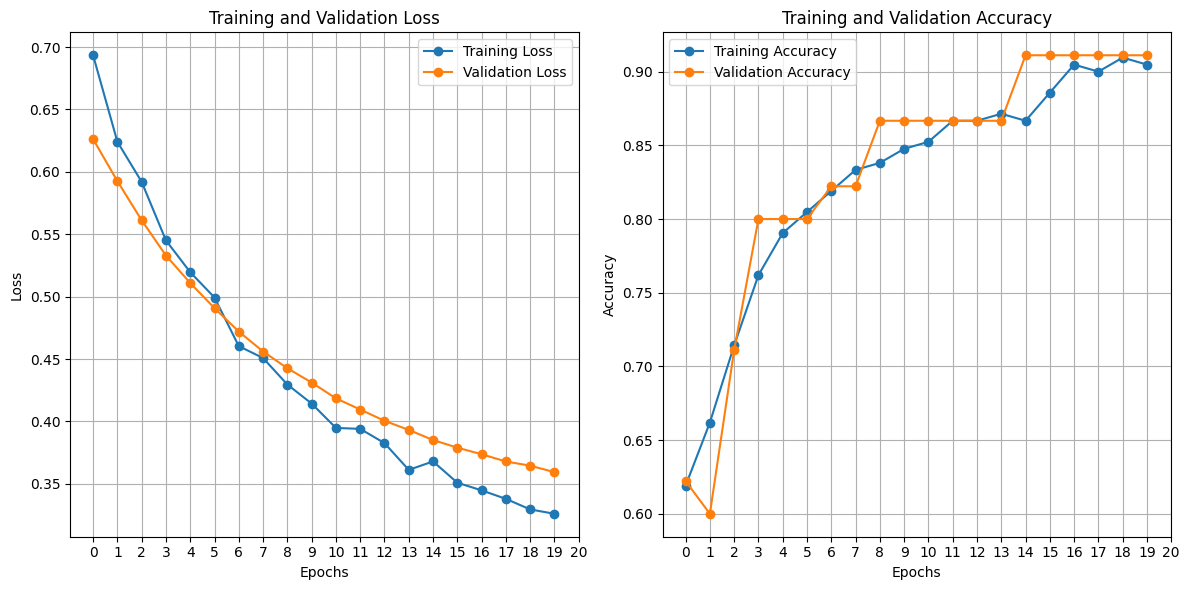

In [ ]:
# Train the model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_save_path = '/content/drive/MyDrive/SafeLens Dataset/Models/g_vit_model.pth'
train_model(g_vit_model, model_save_path, train_loader1, val_loader1, device=device, num_epochs=20)

In [ ]:
vit_model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
g_vit_model = ViTWithMLP(vit_model)
model_save_path = '/content/drive/MyDrive/SafeLens Dataset/Models/g_vit_model.pth'
model = load_best_model(g_vit_model, model_save_path, device='cuda')
preds, labels_final = test_model(model, test_loader1, device='cuda')


<ipython-input-49-388644a17ef4>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_save_path))


Test Loss: 0.3498, Test Accuracy: 0.8444

Classification Report:

              precision    recall  f1-score   support

        Safe       0.83      0.87      0.85        23
      Unsafe       0.86      0.82      0.84        22

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.84      0.84      0.84        45



In [ ]:
import pandas as pd
import numpy as np

# Convert preds and labels_final to lists if they are numpy arrays
preds = preds.tolist() if isinstance(preds, np.ndarray) else preds
labels_final = labels_final.tolist() if isinstance(labels_final, np.ndarray) else labels_final

# Access the image paths and categories from the test dataset
image_paths = [test_dataset1.data.iloc[i, 0] for i in range(len(test_dataset1))]
categories = [test_dataset1.data.iloc[i, 2] for i in range(len(test_dataset1))]

# Create a new DataFrame
new_data = {'image_path': image_paths, 'category': categories, 'preds': preds, 'labels': labels_final}
new_df = pd.DataFrame(new_data)
new_df.to_csv("/content/image_test_predictions_1.csv", index=False)


# Add the new columns to the existing train_dataset1 DataFrame (assuming it is accessible)
# test_dataset1.data = pd.concat([train_dataset1.data, new_df], axis=1)
print(new_df.head())

                                          image_path    category  preds  \
0  /content/drive/MyDrive/SafeLens Dataset/Safe-I...       Joy_0      0   
1  /content/drive/MyDrive/SafeLens Dataset/Unsafe...  Violence_1      1   
2  /content/drive/MyDrive/SafeLens Dataset/Safe-I...       H&S_0      0   
3  /content/drive/MyDrive/SafeLens Dataset/Safe-I...   Culture_0      1   
4  /content/drive/MyDrive/SafeLens Dataset/Unsafe...  Violence_1      0   

   labels  
0       0  
1       1  
2       0  
3       0  
4       1  


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

df = pd.read_csv("/content/image_test_predictions_1.csv")

# Get the unique categories
categories = df['category'].unique()

# Initialize a DataFrame to store metrics for each category
category_metrics_df = pd.DataFrame(columns=['Category', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over each category and calculate metrics
for category in categories:
    category_df = df[df['category'] == category]
    y_true = category_df['labels']
    y_pred = category_df['preds']

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    # Append metrics to the DataFrame using loc
    category_metrics_df.loc[len(category_metrics_df)] = {
        'Category': category,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Print the DataFrame
print(category_metrics_df)

# Print overall classification report
y_true_overall = df['labels']
y_pred_overall = df['preds']
print("\nOverall Classification Report:")
print(classification_report(y_true_overall, y_pred_overall, zero_division=1))


       Category  Accuracy  Precision    Recall  F1 Score
0         Joy_0  0.833333        1.0  0.833333  0.909091
1    Violence_1  0.866667        1.0  0.866667  0.928571
2         H&S_0  1.000000        1.0  1.000000  1.000000
3     Culture_0  0.750000        1.0  0.750000  0.857143
4  Profession_1  0.000000        1.0  0.000000  0.000000
5  Profession_0  1.000000        1.0  1.000000  1.000000
6     Medical_1  1.000000        1.0  1.000000  1.000000
7     Illegal_1  1.000000        1.0  1.000000  1.000000
8       Other_0  0.000000        1.0  0.000000  0.000000
9    Violence_0  1.000000        1.0  1.000000  1.000000

Overall Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.86      0.82      0.84        22

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.84      0.84      0.84        45



In [ ]:
swin_model = SwinForImageClassification.from_pretrained('microsoft/swin-tiny-patch4-window7-224')
swin_model = ViTWithMLP(swin_model)

config.json:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/113M [00:00<?, ?B/s]

Epoch 1, Loss: 0.7696, Accuracy: 0.4857
Validation Loss: 0.8151, Validation Accuracy: 0.5111
Saved best model with validation loss: 0.8151
Epoch 2, Loss: 0.7272, Accuracy: 0.5429
Validation Loss: 0.7786, Validation Accuracy: 0.6000
Saved best model with validation loss: 0.7786
Epoch 3, Loss: 0.7123, Accuracy: 0.5762
Validation Loss: 0.7460, Validation Accuracy: 0.5778
Saved best model with validation loss: 0.7460
Epoch 4, Loss: 0.6582, Accuracy: 0.6476
Validation Loss: 0.7175, Validation Accuracy: 0.6444
Saved best model with validation loss: 0.7175
Epoch 5, Loss: 0.5910, Accuracy: 0.6952
Validation Loss: 0.6919, Validation Accuracy: 0.6444
Saved best model with validation loss: 0.6919
Epoch 6, Loss: 0.5802, Accuracy: 0.7000
Validation Loss: 0.6669, Validation Accuracy: 0.6444
Saved best model with validation loss: 0.6669
Epoch 7, Loss: 0.5509, Accuracy: 0.7190
Validation Loss: 0.6442, Validation Accuracy: 0.6444
Saved best model with validation loss: 0.6442
Epoch 8, Loss: 0.5382, Accu

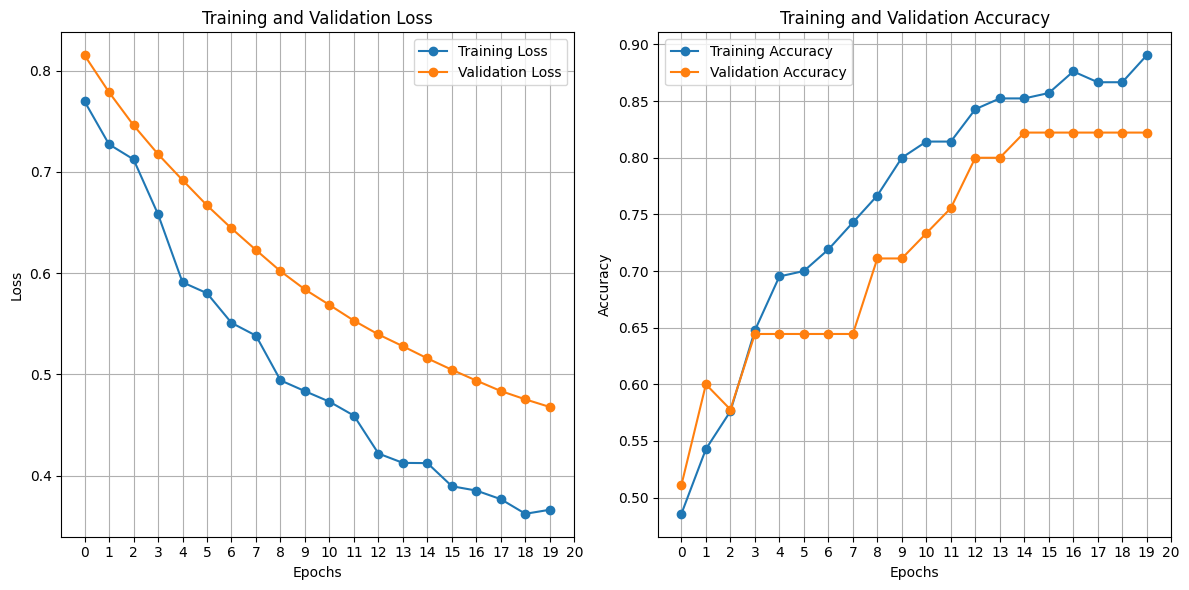

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_save_path = '/content/drive/MyDrive/SafeLens Dataset/Models/swin_model.pth'
train_model(swin_model, model_save_path, train_loader2, val_loader2, device=device, num_epochs=20)

In [ ]:
swin_model = SwinForImageClassification.from_pretrained('microsoft/swin-tiny-patch4-window7-224')
swin_model = ViTWithMLP(swin_model)
model_save_path = '/content/drive/MyDrive/SafeLens Dataset/Models/swin_model.pth'
model = load_best_model(swin_model, model_save_path, device='cuda')
preds, labels_final = test_model(model, test_loader2, device='cuda')

<ipython-input-49-388644a17ef4>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_save_path))


Test Loss: 0.4830, Test Accuracy: 0.7333

Classification Report:

              precision    recall  f1-score   support

        Safe       0.92      0.52      0.67        23
      Unsafe       0.66      0.95      0.78        22

    accuracy                           0.73        45
   macro avg       0.79      0.74      0.72        45
weighted avg       0.79      0.73      0.72        45



In [ ]:
# Convert preds and labels_final to lists if they are numpy arrays
preds = preds.tolist() if isinstance(preds, np.ndarray) else preds
labels_final = labels_final.tolist() if isinstance(labels_final, np.ndarray) else labels_final

# Access the image paths and categories from the test dataset
image_paths = [test_dataset2.data.iloc[i, 0] for i in range(len(test_dataset2))]
categories = [test_dataset2.data.iloc[i, 2] for i in range(len(test_dataset2))]

# Create a new DataFrame
new_data = {'image_path': image_paths, 'category': categories, 'preds': preds, 'labels': labels_final}
new_df = pd.DataFrame(new_data)
new_df.to_csv("/content/image_test_predictions_2.csv", index=False)


# Add the new columns to the existing train_dataset1 DataFrame (assuming it is accessible)
# test_dataset1.data = pd.concat([train_dataset1.data, new_df], axis=1)
print(new_df.head())

                                          image_path    category  preds  \
0  /content/drive/MyDrive/SafeLens Dataset/Safe-I...       Joy_0      0   
1  /content/drive/MyDrive/SafeLens Dataset/Unsafe...  Violence_1      1   
2  /content/drive/MyDrive/SafeLens Dataset/Safe-I...       H&S_0      1   
3  /content/drive/MyDrive/SafeLens Dataset/Safe-I...   Culture_0      0   
4  /content/drive/MyDrive/SafeLens Dataset/Unsafe...  Violence_1      1   

   labels  
0       0  
1       1  
2       0  
3       0  
4       1  


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

df = pd.read_csv("/content/image_test_predictions_2.csv")

# Get the unique categories
categories = df['category'].unique()

# Initialize a DataFrame to store metrics for each category
category_metrics_df = pd.DataFrame(columns=['Category', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over each category and calculate metrics
for category in categories:
    category_df = df[df['category'] == category]
    y_true = category_df['labels']
    y_pred = category_df['preds']

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    # Append metrics to the DataFrame using loc
    category_metrics_df.loc[len(category_metrics_df)] = {
        'Category': category,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Print the DataFrame
print(category_metrics_df)

# Print overall classification report
y_true_overall = df['labels']
y_pred_overall = df['preds']
print("\nOverall Classification Report:")
print(classification_report(y_true_overall, y_pred_overall, zero_division=1))


       Category  Accuracy  Precision  Recall  F1 Score
0         Joy_0       1.0        1.0     1.0  1.000000
1    Violence_1       1.0        1.0     1.0  1.000000
2         H&S_0       0.0        1.0     0.0  0.000000
3     Culture_0       1.0        1.0     1.0  1.000000
4  Profession_1       0.5        1.0     0.5  0.666667
5  Profession_0       0.2        1.0     0.2  0.333333
6     Medical_1       1.0        1.0     1.0  1.000000
7     Illegal_1       1.0        1.0     1.0  1.000000
8       Other_0       0.0        1.0     0.0  0.000000
9    Violence_0       0.0        1.0     0.0  0.000000

Overall Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.52      0.67        23
           1       0.66      0.95      0.78        22

    accuracy                           0.73        45
   macro avg       0.79      0.74      0.72        45
weighted avg       0.79      0.73      0.72        45



In [ ]:
class CLIPWithMLP(nn.Module):
    def __init__(self, clip_model):
        super(CLIPWithMLP, self).__init__()
        self.clip = clip_model.vision_model
        self.classifier = nn.Linear(768, 2)  # Use 768 as the input size, as it's the output feature size of CLIP Vision Transformer

    def forward(self, x):
        # Use CLIP's vision model to extract image features
        with torch.no_grad():
            x = self.clip(x).last_hidden_state  # Get the last hidden state of the vision model
        x = x.mean(dim=1)  # Global average pooling to reduce sequence dimension
        return self.classifier(x)  # Pass the pooled features to the classifier

In [ ]:
CLIPModel.from_pretrained("openai/clip-vit-base-patch16")

config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e

In [ ]:
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
clip_model = CLIPWithMLP(clip_model)

config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

Epoch 1, Loss: 0.7027, Accuracy: 0.5381
Validation Loss: 0.6883, Validation Accuracy: 0.5111
Saved best model with validation loss: 0.6883
Epoch 2, Loss: 0.6897, Accuracy: 0.5571
Validation Loss: 0.6806, Validation Accuracy: 0.5556
Saved best model with validation loss: 0.6806
Epoch 3, Loss: 0.6821, Accuracy: 0.5524
Validation Loss: 0.6742, Validation Accuracy: 0.5111
Saved best model with validation loss: 0.6742
Epoch 4, Loss: 0.6738, Accuracy: 0.5857
Validation Loss: 0.6674, Validation Accuracy: 0.5556
Saved best model with validation loss: 0.6674
Epoch 5, Loss: 0.6631, Accuracy: 0.6286
Validation Loss: 0.6599, Validation Accuracy: 0.6000
Saved best model with validation loss: 0.6599
Epoch 6, Loss: 0.6567, Accuracy: 0.6762
Validation Loss: 0.6530, Validation Accuracy: 0.7111
Saved best model with validation loss: 0.6530
Epoch 7, Loss: 0.6448, Accuracy: 0.7095
Validation Loss: 0.6470, Validation Accuracy: 0.6667
Saved best model with validation loss: 0.6470
Epoch 8, Loss: 0.6369, Accu

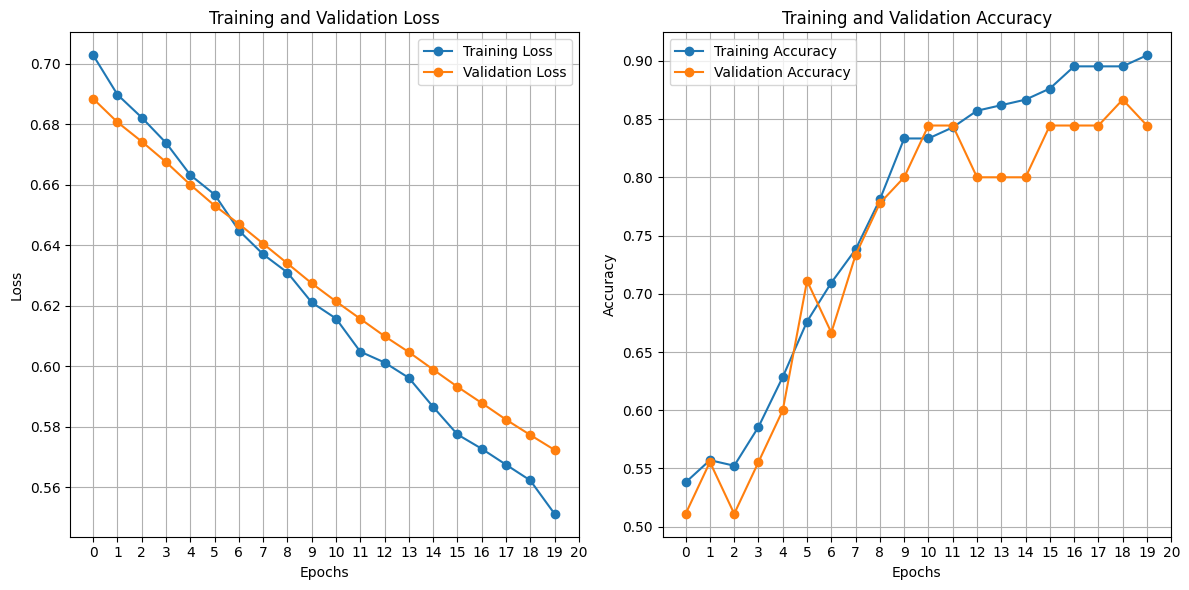

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_save_path = '/content/drive/MyDrive/SafeLens Dataset/Models/clip_model.pth'
train_model(clip_model, model_save_path, train_loader3, val_loader3, device=device, num_epochs=20)

In [ ]:
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
clip_model = CLIPWithMLP(clip_model)
model_save_path = '/content/drive/MyDrive/SafeLens Dataset/Models/clip_model.pth'
model = load_best_model(clip_model, model_save_path, device='cuda')
preds, labels_final = test_model(model, test_loader3, device='cuda')

<ipython-input-49-388644a17ef4>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_save_path))


Test Loss: 0.5469, Test Accuracy: 0.8667

Classification Report:

              precision    recall  f1-score   support

        Safe       0.79      1.00      0.88        23
      Unsafe       1.00      0.73      0.84        22

    accuracy                           0.87        45
   macro avg       0.90      0.86      0.86        45
weighted avg       0.89      0.87      0.86        45



In [ ]:
# Convert preds and labels_final to lists if they are numpy arrays
preds = preds.tolist() if isinstance(preds, np.ndarray) else preds
labels_final = labels_final.tolist() if isinstance(labels_final, np.ndarray) else labels_final

# Access the image paths and categories from the test dataset
image_paths = [test_dataset3.data.iloc[i, 0] for i in range(len(test_dataset3))]
categories = [test_dataset3.data.iloc[i, 2] for i in range(len(test_dataset3))]

# Create a new DataFrame
new_data = {'image_path': image_paths, 'category': categories, 'preds': preds, 'labels': labels_final}
new_df = pd.DataFrame(new_data)
new_df.to_csv("/content/image_test_predictions_3.csv", index=False)


# Add the new columns to the existing train_dataset1 DataFrame (assuming it is accessible)
# test_dataset1.data = pd.concat([train_dataset1.data, new_df], axis=1)
print(new_df.head())

                                          image_path    category  preds  \
0  /content/drive/MyDrive/SafeLens Dataset/Safe-I...       Joy_0      0   
1  /content/drive/MyDrive/SafeLens Dataset/Unsafe...  Violence_1      0   
2  /content/drive/MyDrive/SafeLens Dataset/Safe-I...       H&S_0      0   
3  /content/drive/MyDrive/SafeLens Dataset/Safe-I...   Culture_0      0   
4  /content/drive/MyDrive/SafeLens Dataset/Unsafe...  Violence_1      1   

   labels  
0       0  
1       1  
2       0  
3       0  
4       1  


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

df = pd.read_csv("/content/image_test_predictions_3.csv")

# Get the unique categories
categories = df['category'].unique()

# Initialize a DataFrame to store metrics for each category
category_metrics_df = pd.DataFrame(columns=['Category', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over each category and calculate metrics
for category in categories:
    category_df = df[df['category'] == category]
    y_true = category_df['labels']
    y_pred = category_df['preds']

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    # Append metrics to the DataFrame using loc
    category_metrics_df.loc[len(category_metrics_df)] = {
        'Category': category,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Print the DataFrame
print(category_metrics_df)

# Print overall classification report
y_true_overall = df['labels']
y_pred_overall = df['preds']
print("\nOverall Classification Report:")
print(classification_report(y_true_overall, y_pred_overall, zero_division=1))


       Category  Accuracy  Precision    Recall  F1 Score
0         Joy_0  1.000000        1.0  1.000000  1.000000
1    Violence_1  0.666667        1.0  0.666667  0.800000
2         H&S_0  1.000000        1.0  1.000000  1.000000
3     Culture_0  1.000000        1.0  1.000000  1.000000
4  Profession_1  1.000000        1.0  1.000000  1.000000
5  Profession_0  1.000000        1.0  1.000000  1.000000
6     Medical_1  1.000000        1.0  1.000000  1.000000
7     Illegal_1  0.500000        1.0  0.500000  0.666667
8       Other_0  1.000000        1.0  1.000000  1.000000
9    Violence_0  1.000000        1.0  1.000000  1.000000

Overall Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        23
           1       1.00      0.73      0.84        22

    accuracy                           0.87        45
   macro avg       0.90      0.86      0.86        45
weighted avg       0.89      0.87      0.86        45

